1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [30]:
import numpy as np
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b = (np.mean(x*y) - np.mean(x)*np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)
a = np.mean(y) - b*np.mean(x)
print(f'b = {b}; a = {a}')
yp = a + b*x
print(y)
print(yp)
# без intercept
y0 = b*x
print(y0)

b = 2.620538882402765; a = 444.1773573243596
[401 574 874 919 459 739 653 902 746 832]
[535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]
[ 91.71886088 117.92424971 497.90238766 524.10777648 104.8215553
 183.43772177 141.50909965 393.08083236 314.46466589 288.25927706]


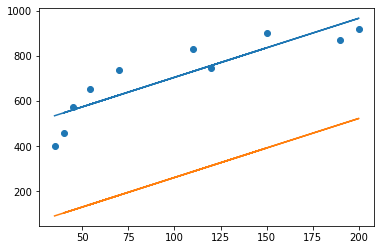

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x, y)
plt.plot(x, yp)
plt.plot(x, y0)

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [37]:
n = len(x)
def mse_(B1, X = x, y = y, n=n):
    return np.sum((B1*X - y)**2) / n
alpha = 1e-10
B1 = 0.1
for i in range(1000):
    B1 -= alpha*(2/n)*np.sum((B1*x-y)*x)
    if i%100 == 0:
        print(f'Iteration {i}, B1 = {B1}, mse = {mse_(B1)}')

Iteration 0, B1 = 0.100015952808, mse = 518333.78108267515
Iteration 100, B1 = 0.10161101165497242, mse = 518079.3601590412
Iteration 200, B1 = 0.10320563107212652, mse = 517825.07939918916
Iteration 300, B1 = 0.10479981118052274, mse = 517570.93872590084
Iteration 400, B1 = 0.10639355210118823, mse = 517316.9380620007
Iteration 500, B1 = 0.10798685395511673, mse = 517063.0773303558
Iteration 600, B1 = 0.10957971686326862, mse = 516809.35645387584
Iteration 700, B1 = 0.11117214094657109, mse = 516555.77535551257
Iteration 800, B1 = 0.1127641263259179, mse = 516302.33395826037
Iteration 900, B1 = 0.11435567312216967, mse = 516049.03218515625


3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?